# London Housing

Main goal of this project was to find out which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades.

There are 32 boroughs within Greater London.     
Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## Data Science Pipeline

1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 

## Sourcing and Loading 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data
I got data from the [London Datastore](https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
df = pd.read_csv(r"C:\Users\vikag\Desktop\ONGOING!!!!\housing_in_london_monthly_variables.csv", index_col= None)

## Cleaning, transforming, and visualizing

**Exploring data** 

Checking dataframe

In [3]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


**Cleaning the data**

Choosing only the rows that we going to use

In [4]:
df = df[['area', 'code', 'date', 'average_price']]

In [5]:
df.head()

,area,code,date,average_price
0,city of london,E09000001,1995-01-01,91449
1,city of london,E09000001,1995-02-01,82203
2,city of london,E09000001,1995-03-01,79121
3,city of london,E09000001,1995-04-01,77101
4,city of london,E09000001,1995-05-01,84409


In [6]:
df['area'].value_counts()

hackney                   302
south east                302
enfield                   302
tower hamlets             302
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
westminster               301
inner london              301
outer london              301
city of london            301
merton                    301
north east                301
north west                301
yorks and the humber      301
east midlands             301
west midlands             301
east of england           301
london                    301
south west                301
newham                    301
kingston upon thames      301
lewisham                  301
lambeth                   301
barnet                    301
bexley                    301
brent                     301
bromley                   301
camden                    301
croydon                   301
ealing    

I know that only 32 boroughs in London
I need to clean my data

In [7]:
NoNBoroughs = ['south east', 'inner london', 'outer london', 'north east', 'north west', 'yorks and the humber', 
               'east midlands', 'west midlands', 'east of england', 'london', 'south west', 'england']

Remove rows which are not London boroughs

In [8]:
df = df[~df['area'].isin(NoNBoroughs)]

In [9]:
df['area'].value_counts()

enfield                   302
hackney                   302
tower hamlets             302
hounslow                  301
kensington and chelsea    301
kingston upon thames      301
lambeth                   301
lewisham                  301
merton                    301
city of london            301
newham                    301
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
islington                 301
havering                  301
hillingdon                301
barking and dagenham      301
harrow                    301
haringey                  301
hammersmith and fulham    301
greenwich                 301
ealing                    301
croydon                   301
camden                    301
bromley                   301
brent                     301
bexley                    301
barnet                    301
westminster               301
Name: area

**Transforming the data**

Rename some columns

In [10]:
df = df.rename(columns={'area':'London_Borough', pd.NaT: 'code'})
df.head()

,London_Borough,code,date,average_price
0,city of london,E09000001,1995-01-01,91449
1,city of london,E09000001,1995-02-01,82203
2,city of london,E09000001,1995-03-01,79121
3,city of london,E09000001,1995-04-01,77101
4,city of london,E09000001,1995-05-01,84409


In [11]:
df = df.rename(columns={'date':'Month', 'average_price':'Average_Price', 'code':'ID' })
df.head()

,London_Borough,ID,Month,Average_Price
0,city of london,E09000001,1995-01-01,91449
1,city of london,E09000001,1995-02-01,82203
2,city of london,E09000001,1995-03-01,79121
3,city of london,E09000001,1995-04-01,77101
4,city of london,E09000001,1995-05-01,84409


Making sure that the columns data type are all correct

In [12]:
df.dtypes

London_Borough    object
ID                object
Month             object
Average_Price      int64
dtype: object

In [13]:
df.count()

London_Borough    9936
ID                9936
Month             9936
Average_Price     9936
dtype: int64

Changing data type of Month column

In [14]:
df['Month'] = pd.to_datetime(df['Month'])

In [15]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price              int64
dtype: object

Checking unique values of London Borough column.

In [16]:
df['London_Borough'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

Checking NaN

In [17]:
df.isna().sum()

London_Borough    0
ID                0
Month             0
Average_Price     0
dtype: int64

**Visualizing the data**

Making a line plot of Month against Average Price of one of the boroughs, specifically 'Camden'

In [18]:
Month_Price = df[df['London_Borough'] == 'camden']

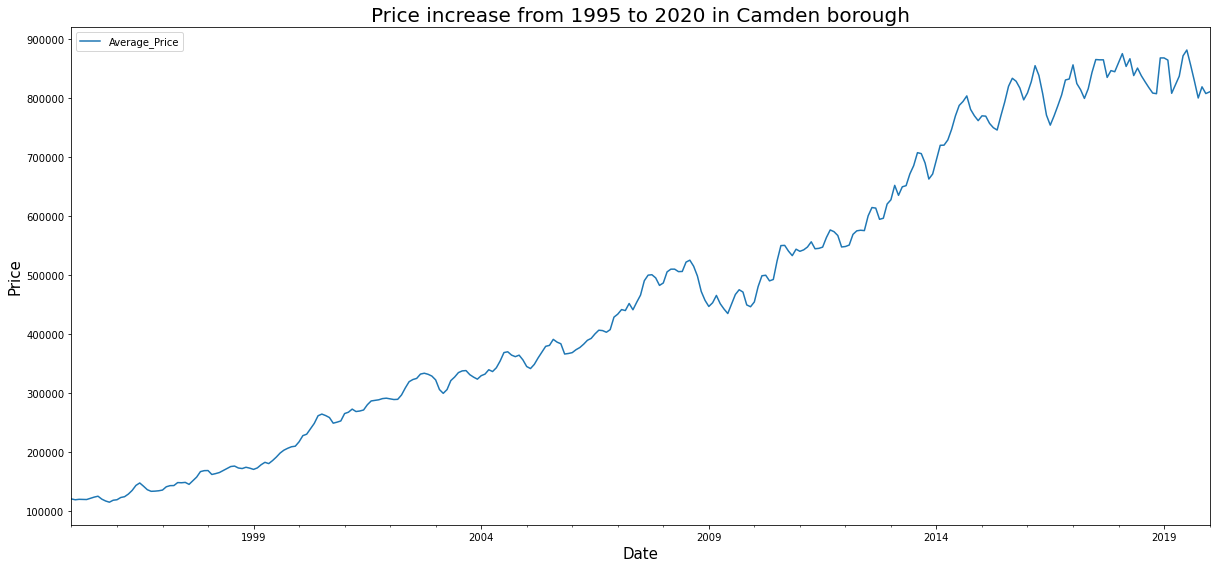

In [19]:
MP = Month_Price.plot(kind ='line', x = 'Month', y = 'Average_Price', figsize=(17, 8))
plt.title('Price increase from 1995 to 2020 in Camden borough', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Price', size=15)
plt.tight_layout()

**Creating 'Year' column by using lambda function**

1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 
 

In [20]:
df['Year'] = df['Month'].apply(lambda t: t.year)

In [21]:
df.head()

,London_Borough,ID,Month,Average_Price,Year
0,city of london,E09000001,1995-01-01,91449,1995
1,city of london,E09000001,1995-02-01,82203,1995
2,city of london,E09000001,1995-03-01,79121,1995
3,city of london,E09000001,1995-04-01,77101,1995
4,city of london,E09000001,1995-05-01,84409,1995


Grouping by Borough and Year, and getting yearly average price

In [22]:
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average_Price
London_Borough,Year,
tower hamlets,2008,298002.166667
richmond upon thames,2000,227866.166667
hammersmith and fulham,2020,749337.000000
lewisham,2016,402648.666667
city of london,2015,760253.166667
merton,2007,297858.500000
hammersmith and fulham,1995,123238.166667
newham,2007,226388.583333
bexley,1998,80632.000000


Reseting index to get clean DF

In [23]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_Price
0,barking and dagenham,1995,51818.000000
1,barking and dagenham,1996,51718.250000
2,barking and dagenham,1997,55974.250000
3,barking and dagenham,1998,60285.750000
4,barking and dagenham,1999,65320.833333


## Modeling

Creating a function that will calculate a ratio of house prices

In [24]:
def create_price_ratio(d):
    y1995 = float(d['Average_Price'][d['Year']==1995])
    y2020 = float(d['Average_Price'][d['Year']==2020])
    ratio = [y2020/y1995]
    return ratio

In [25]:
create_price_ratio(dfg[dfg['London_Borough']=='camden'])

[6.7318716513120584]

Making empty dictionary to store new calculated ratio    
Making forloop to get ratio for all the boroughs

In [26]:
final = {}

In [27]:
for Bor in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == Bor]
    final[Bor] = create_price_ratio(borough) 
print(final)

{'barking and dagenham': [5.809892315411633], 'barnet': [5.672380641119918], 'bexley': [5.159042331875997], 'brent': [5.593912996842618], 'bromley': [5.328433002205149], 'camden': [6.7318716513120584], 'city of london': [7.824685875763233], 'croydon': [5.348870725927359], 'ealing': [5.827078106964217], 'enfield': [5.436814303128809], 'greenwich': [6.194992092570171], 'hackney': [8.661641608691701], 'hammersmith and fulham': [6.080397171330851], 'haringey': [7.227008497911425], 'harrow': [5.509139074169232], 'havering': [5.260432062076735], 'hillingdon': [5.602661936344019], 'hounslow': [5.653213663066352], 'islington': [7.047450940036175], 'kensington and chelsea': [6.109005494996947], 'kingston upon thames': [5.833604944530958], 'lambeth': [7.733414579532565], 'lewisham': [7.005959701604491], 'merton': [6.309207659126034], 'newham': [6.7580589746996065], 'redbridge': [5.764082639276389], 'richmond upon thames': [6.143413098274978], 'southwark': [7.821537503890445], 'sutton': [5.286945

In [28]:
df_ratios = pd.DataFrame(final)

In [29]:
df_ratios.head()

,barking and dagenham,barnet,bexley,brent,bromley,camden,city of london,croydon,ealing,enfield,...,merton,newham,redbridge,richmond upon thames,southwark,sutton,tower hamlets,waltham forest,wandsworth,westminster
0,5.809892,5.672381,5.159042,5.593913,5.328433,6.731872,7.824686,5.348871,5.827078,5.436814,...,6.309208,6.758059,5.764083,6.143413,7.821538,5.286945,7.080155,7.380868,6.870002,7.622373


Transposing and resetting index

In [30]:
df_ratios_t = df_ratios.transpose()
df_ratios = df_ratios_t.reset_index()
df_ratios.head()

,index,0
0,barking and dagenham,5.809892
1,barnet,5.672381
2,bexley,5.159042
3,brent,5.593913
4,bromley,5.328433


Creating nice clean DF

In [31]:
df_ratios.rename(columns={'index':'Borough', 0:'2020'}, inplace=True)
df_ratios.head()

,Borough,2020
0,barking and dagenham,5.809892
1,barnet,5.672381
2,bexley,5.159042
3,brent,5.593913
4,bromley,5.328433


In [32]:
top_sorted = df_ratios.sort_values(by='2020',ascending=False).head(32)

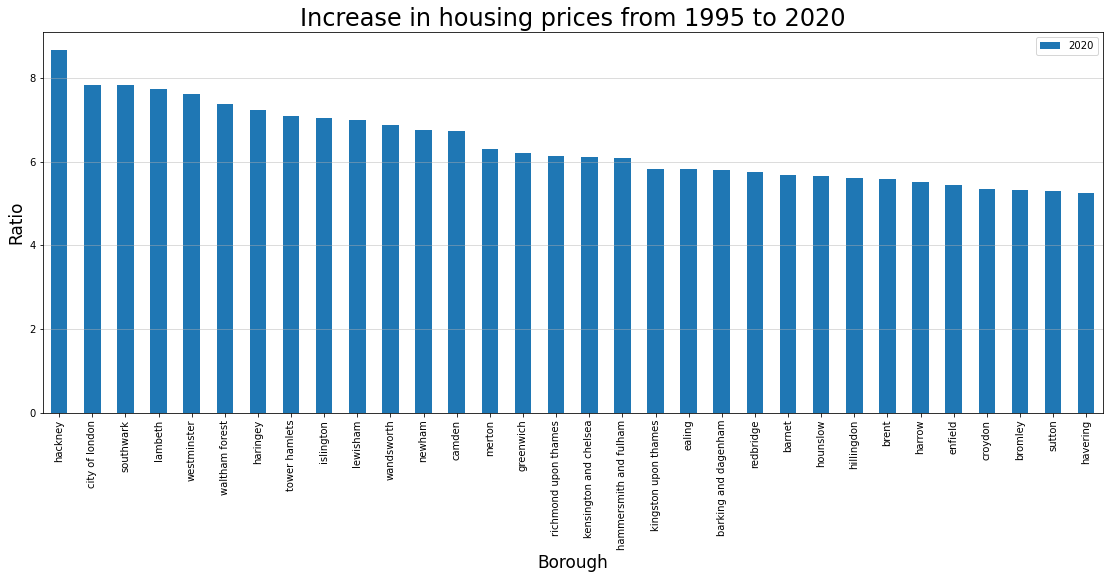

In [33]:
filter_result = top_sorted[['Borough','2020']].plot(kind='bar', figsize=(19, 7), color=sns.color_palette())
filter_result.set_xticklabels(top_sorted.Borough)
plt.grid(axis='y', alpha=0.55)
plt.title('Increase in housing prices from 1995 to 2020', size=24)
plt.xlabel('Borough', size=17)
plt.ylabel('Ratio', size=17)
plt.show()

## Conclusion

After cleaning and analyzing data from the London Datastore and looking at the graphs, I came to the conclusion that the housing prices have been growing from 1995 to 2020, except prices dropped around 2009.   
Based on average increas ratio of each borough from 1995 to 2020, the Hackney borough have the greatest increase in housing prices (around 8.66 times) over the last two decades.